<a href="https://colab.research.google.com/github/michaeledge27/CSCI290/blob/main/notebooks/heights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
heights = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/heights.csv")

In [17]:
heights.head()

,Father,Son,Group
0,65.04851,59.77827,65.0
1,63.25094,63.21404,63.0
2,64.95532,63.34242,65.0
3,65.75250,62.79238,66.0
4,61.13723,64.28113,61.0


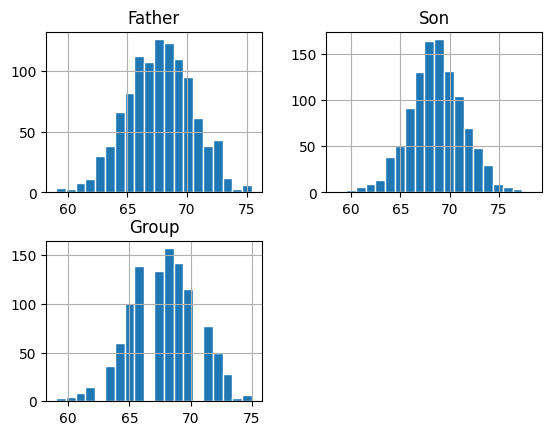

In [20]:
heights.hist( edgecolor = "white", bins = 20 );

<Axes: xlabel='Father', ylabel='Son'>

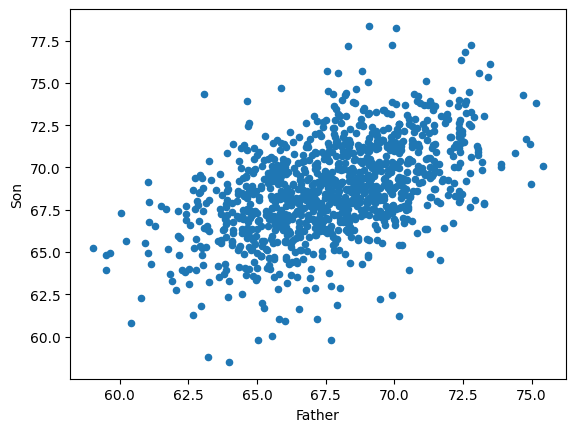

In [4]:
heights.plot( kind = 'scatter', x = "Father", y = "Son")

In [5]:
heights.describe()

,Father,Son
count,1078.000000,1078.000000
mean,67.687097,68.684070
std,2.744868,2.814702
min,59.008000,58.507080
25%,65.787735,66.931232
50%,67.766600,68.615820
75%,69.602980,70.465970
max,75.433930,78.364790


In [6]:
heights["Group"] = heights["Father"].round()

In [7]:
heights.head()

,Father,Son,Group
0,65.04851,59.77827,65.0
1,63.25094,63.21404,63.0
2,64.95532,63.34242,65.0
3,65.75250,62.79238,66.0
4,61.13723,64.28113,61.0


In [8]:
son_stats = heights.groupby("Group").agg({"Son":["size","mean","std"]})
son_stats

Son                     
      size       mean       std
Group                          
59.0     3  64.669410  0.661594
60.0     4  64.673850  2.776654
61.0     8  65.930072  2.158895
62.0    15  65.593267  1.775472
63.0    36  66.514124  2.909974
64.0    60  66.701389  2.307661
65.0   101  67.223182  2.534444
66.0   139  67.656250  2.350964
67.0   134  68.139773  2.237706
68.0   157  69.092820  2.760430
69.0   142  69.443967  2.299950
70.0   115  69.768448  2.489530
71.0    77  70.540819  2.305104
72.0    50  70.677187  2.329985
73.0    28  72.049796  2.756266
74.0     3  70.364610  0.445680
75.0     6  71.720700  2.053495

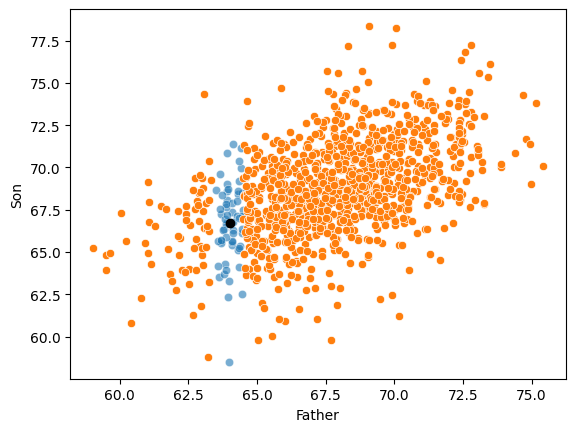

In [9]:
sns.scatterplot( data=heights[ heights["Group"] == 64 ], x="Father", y="Son", alpha=0.6 )
sns.scatterplot( data=heights[ heights["Group"] != 64 ], x="Father", y="Son" )
plt.plot( son_stats.query("Group==64").Son["mean"], 'ok' );

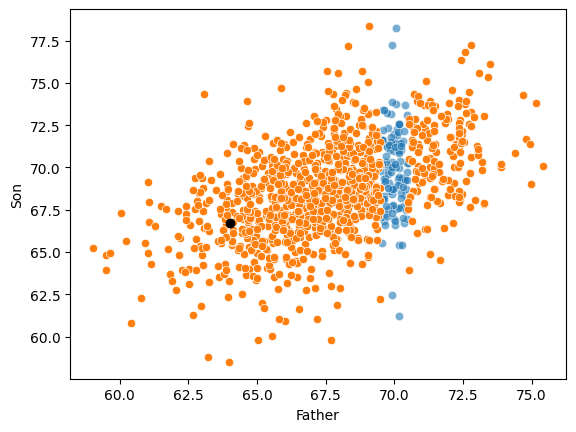

In [22]:
sns.scatterplot( data=heights[ heights["Group"] == 70 ], x="Father", y="Son", alpha=0.6 )
sns.scatterplot( data=heights[ heights["Group"] != 70 ], x="Father", y="Son" )
plt.plot( son_stats.query("Group==64").Son["mean"], 'ok' );

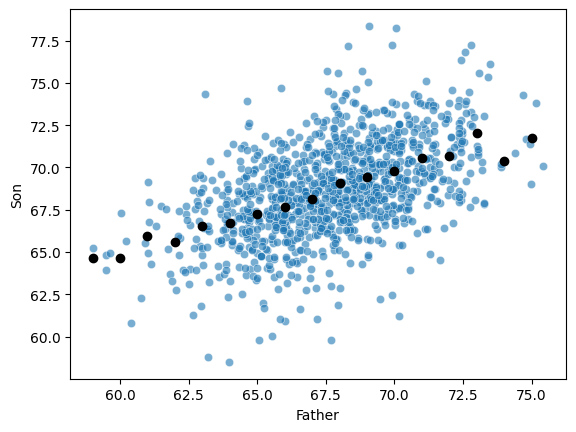

In [23]:
sns.scatterplot(data=heights, x="Father", y="Son",alpha=0.6)
plt.plot(son_stats.Son["mean"], 'ok');

In [24]:
linear_fit = LinearRegression().fit( np.array(heights["Father"]).reshape(-1,1), np.array(heights["Son"]).reshape(-1,1) )

In [25]:
linear_fit.intercept_, linear_fit.coef_

(array([33.88660435]), array([[0.51409304]]))

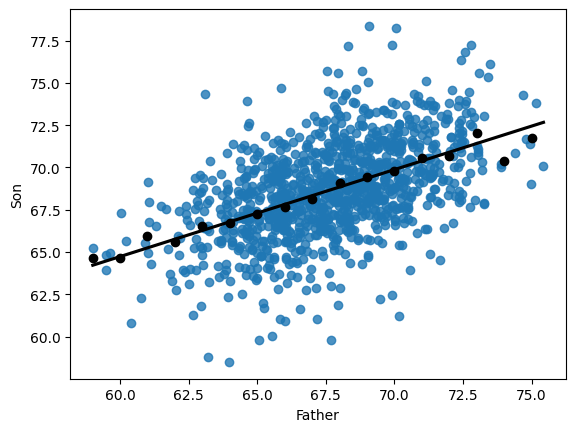

In [26]:
sns.regplot( data=heights, x="Father", y="Son",ci=None,line_kws={"color": "black"})
plt.plot(son_stats.Son["mean"], 'ok')

In [27]:
import statsmodels.formula.api as smf

In [16]:
heights_model = smf.ols("Son ~ Father", data=heights).fit()
print( heights_model.summary() )

                            OLS Regression Results                            
Dep. Variable:                    Son   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.12e-69
Time:                        18:08:54   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.8866      1.832     18.493      0.0